In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [96]:
# Load the data
data = pd.read_csv('ITSM_data.csv')

C:\Users\dutoite1\AppData\Local\Temp\ipykernel_32156\2936466500.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('ITSM_data.csv')


Step 1: Data Preprocessing
Load the Dataset: Load the dataset into a pandas DataFrame.
Convert Date Columns: Convert date columns to datetime objects.
Calculate Response Time: Calculate the response time in hours.

In [97]:
##Convert Date Columns: Convert date columns to datetime objects.

data['Reported Date'] = pd.to_datetime(data['Open_Time'], dayfirst=True, errors='coerce')
data['Resolved Date'] = pd.to_datetime(data['Resolved_Time'], dayfirst=True, errors='coerce')

data['Response Time'] = (data['Resolved Date'] - data['Reported Date']).dt.total_seconds() / 3600  # Convert to hours




data['Open_Time'] = pd.to_datetime(df['Open_Time'], dayfirst=True, errors='coerce')
data['Resolved_Time'] = pd.to_datetime(df['Resolved_Time'],dayfirst=True, errors='coerce')
data['Close_Time'] = pd.to_datetime(df['Close_Time'], dayfirst=True, errors='coerce')

data['Resolution Time'] = (data['Close_Time'] - data['Open_Time']).dt.total_seconds() / 3600.0

##print(data)
#print(data.info())

print(data.columns)



Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'Alert_Status', 'No_of_Reassignments', 'Open_Time', 'Reopen_Time',
       'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change',
       'Reported Date', 'Resolved Date', 'Response Time', 'Resolution Time'],
      dtype='object')


Step 2: Feature Engineering
Extract Date Features: Extract useful features from the date columns, such as hour of the day and day of the week.
Encode Categorical Variables: Convert categorical variables into numerical format using one-hot encoding.

In [98]:
# Extract useful features from date columns
data['Reported Hour'] = data['Reported Date'].dt.hour
data['Reported Weekday'] = data['Reported Date'].dt.dayofweek

data['Open_Hour'] = data['Open_Time'].dt.hour
data['Open_DayOfWeek'] = data['Open_Time'].dt.dayofweek
data['Resolved_Hour'] = data['Resolved_Time'].dt.hour
data['Resolved_DayOfWeek'] = data['Resolved_Time'].dt.dayofweek
data['Close_Hour'] = data['Close_Time'].dt.hour
data['Close_DayOfWeek'] = data['Close_Time'].dt.dayofweek

# One-hot encode categorical variables
#data = pd.get_dummies(data, columns=['CI_Cat', 'CI_Subcat', 'Impact'], drop_first=True)



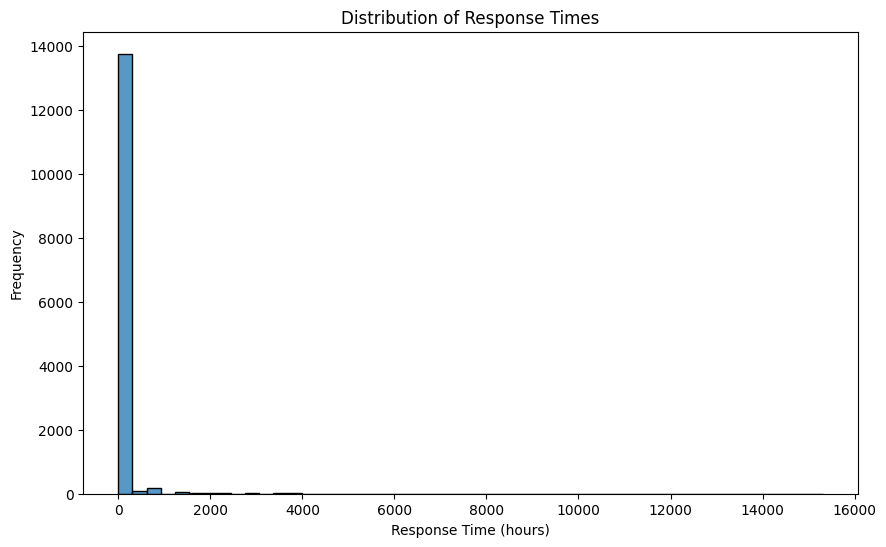

In [99]:
# Exploratory Data Analysis
plt.figure(figsize=(10, 6))
sns.histplot(data['Response Time'], bins=50)
plt.title('Distribution of Response Times')
plt.xlabel('Response Time (hours)')
plt.ylabel('Frequency')
plt.show()

The Exploratory Data Analysis (EDA) shown in the histogram titled "Distribution of Response Times" provides several insights about the data:

1. **High Frequency of Short Response Times**: The histogram shows a prominent bar at the beginning, indicating that a large number of incidents are resolved quickly, within a short time frame. This suggests that the majority of incident requests are handled efficiently.

2. **Long Tail of Response Times**: The rest of the bars are barely visible above the x-axis, indicating that there are very few incidents with longer response times. This long tail could represent outliers or exceptional cases where incidents took significantly longer to resolve.

3. **Skewed Distribution**: The distribution is heavily skewed towards the lower end of the response time spectrum. This skewness indicates that while most incidents are resolved quickly, there are occasional incidents that take much longer to address.

4. **Potential for Improvement**: The presence of a few long response times suggests there might be opportunities to investigate and address the causes of these delays, potentially improving overall efficiency.

Overall, the EDA highlights that while the system is generally efficient in handling incident requests, there are some outliers that could be further analyzed to enhance performance. If you have any specific questions or need further analysis, feel free to ask!

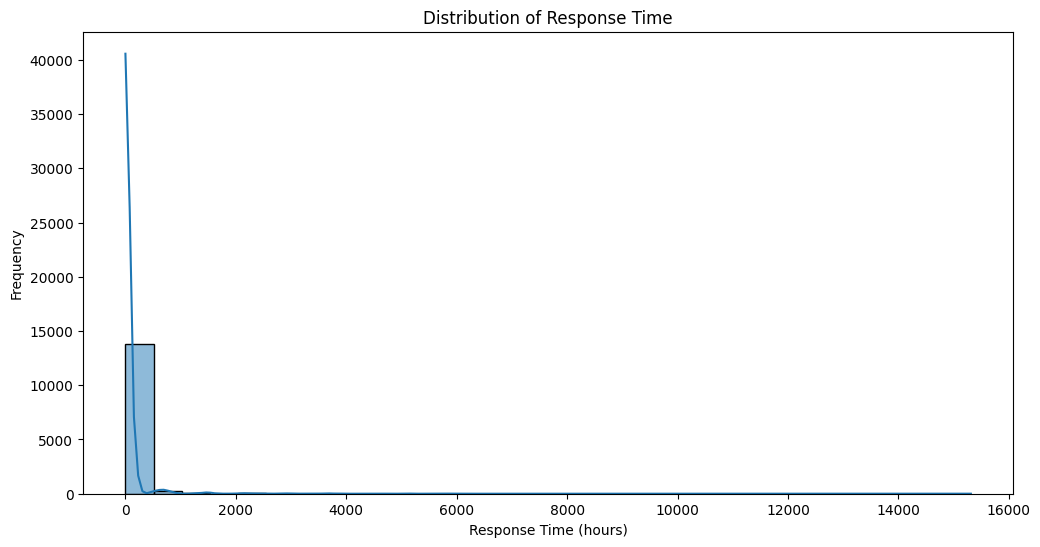

In [100]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
sns.histplot(data['Response Time'], bins=30, kde=True)
plt.title('Distribution of Response Time')
plt.xlabel('Response Time (hours)')
plt.ylabel('Frequency')
plt.show()



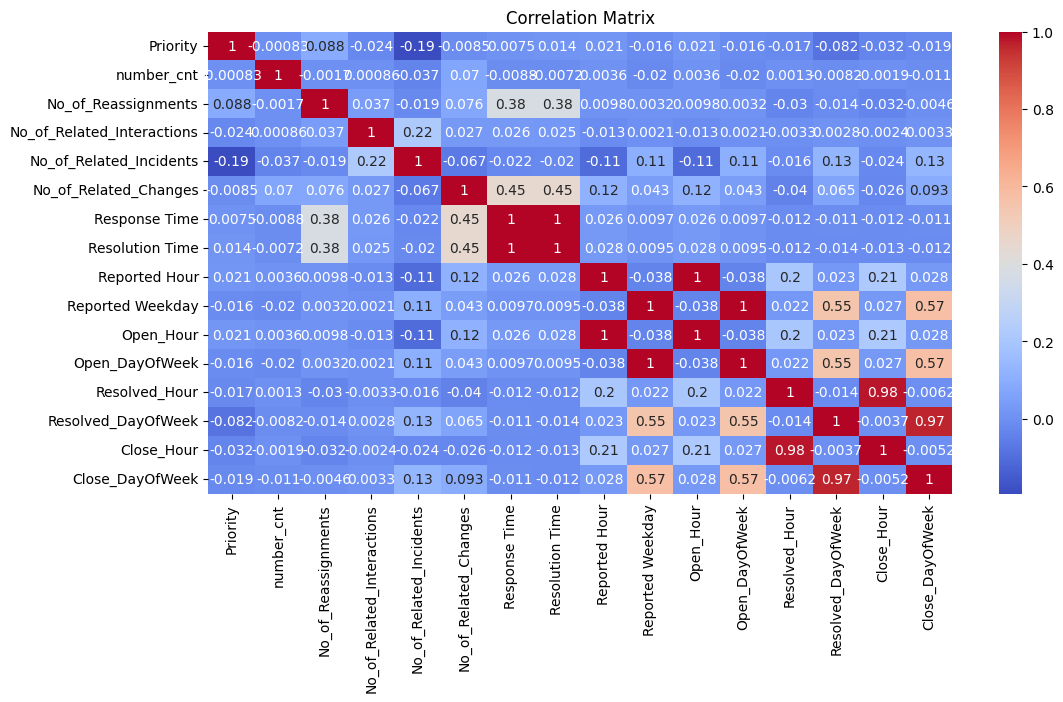

In [101]:
# Correlation matrix

numeric_columns = data.select_dtypes(include=np.number).columns
correlation_matrix = data[numeric_columns].corr()

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')
plt.show()

In [102]:
# Prepare data for predictive analytics
X = data[['Open_Hour', 'Open_DayOfWeek', 'Resolved_Hour', 'Resolved_DayOfWeek', 'Close_Hour', 'Close_DayOfWeek']]
y_response = data['Response Time']
y_resolution = data['Resolution Time']

In [103]:
X_train_response, X_test_response, y_train_response, y_test_response = train_test_split(X, y_response, test_size=0.2, random_state=42)

In [104]:
# Split the data into training and testing sets for response time prediction
X_train_response, X_test_response, y_train_response, y_test_response = train_test_split(X, y_response, test_size=0.2, random_state=42)

# Split the data into training and testing sets for resolution time prediction
X_train_resolution, X_test_resolution, y_train_resolution, y_test_resolution = train_test_split(X, y_resolution, test_size=0.2, random_state=42)

In [107]:
# Train and evaluate Linear Regression model for response time prediction
from sklearn.linear_model import LinearRegression

from sklearn.impute import SimpleImputer

# Create an imputer transformer to fill in missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both the training and testing data
X_train_response_imputed = imputer.fit_transform(X_train_response)
X_test_response_imputed = imputer.transform(X_test_response)

# Drop rows with missing values in y_train_response
X_train_response_imputed = X_train_response_imputed[~np.isnan(y_train_response)]
y_train_response = y_train_response[~np.isnan(y_train_response)]

# Drop rows with missing values in y_test_response
X_test_response_imputed = X_test_response_imputed[~np.isnan(y_test_response)]
y_test_response = y_test_response[~np.isnan(y_test_response)]

# Train and evaluate Linear Regression model for response time prediction
lr_model_response = LinearRegression()
lr_model_response.fit(X_train_response_imputed, y_train_response)
y_pred_response_lr = lr_model_response.predict(X_test_response_imputed)



mae_response_lr = mean_absolute_error(y_test_response, y_pred_response_lr)
rmse_response_lr = np.sqrt(mean_squared_error(y_test_response, y_pred_response_lr))

print(f"Linear Regression - Response Time Prediction: MAE={mae_response_lr}, RMSE={rmse_response_lr}")

Linear Regression - Response Time Prediction: MAE=93.99132252372209, RMSE=440.3687946014165


In [111]:
# Assuming data is a DataFrame and 'Response Time' is the target variable
X = data.drop(columns=['Response Time'])
y = data['Response Time']

In [112]:
# Combine X and y for outlier detection
data_combined = pd.concat([X, y], axis=1)

In [114]:
# Convert columns to numeric data types
data_combined = data_combined.apply(pd.to_numeric, errors='coerce')

# Detect outliers using IQR
Q1 = data_combined.quantile(0.25)
Q3 = data_combined.quantile(0.75)
IQR = Q3 - Q1

In [115]:
# Filter out outliers
data_filtered = data_combined[~((data_combined < (Q1 - 1.5 * IQR)) | (data_combined > (Q3 + 1.5 * IQR))).any(axis=1)]


In [116]:
# Split the filtered data back into X and y
X_filtered = data_filtered.drop(columns=['Response Time'])
y_filtered = data_filtered['Response Time']

In [117]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)


In [120]:
# Remove rows with NaN values in y_train
X_train_imputed = X_train_imputed[~np.isnan(y_train)]
y_train = y_train[~np.isnan(y_train)]

# Train the Linear Regression model
model.fit(X_train_imputed, y_train)


LinearRegression()

In [124]:
from sklearn.impute import SimpleImputer
# Create an imputer transformer to fill in missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Create a pipeline with the imputer and the LinearRegression model
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
model = make_pipeline(imputer, LinearRegression())

# Ensure X_train and y_train have the same number of samples
X_train = X_train[:len(y_train)]

# Fit the pipeline on the training data

model.fit(X_train, y_train)



# Make predictions on the test set
y_pred = model.predict(X_test)

C:\Users\dutoite1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['CI_Name' 'CI_Cat' 'CI_Subcat' 'WBS' 'Incident_ID' 'Status' 'Category'
 'KB_number' 'Alert_Status' 'Reopen_Time' 'Closure_Code'
 'Related_Interaction' 'Related_Change']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\dutoite1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['CI_Name' 'CI_Cat' 'CI_Subcat' 'WBS' 'Incident_ID' 'Status' 'Category'
 'KB_number' 'Alert_Status' 'Reopen_Time' 'Closure_Code'
 'Related_Interaction' 'Related_Change']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [135]:
# Check lengths of y_test and y_pred
print(f"Length of y_test: {len(y_test)}")
print(f"Length of y_pred: {len(y_pred)}")

# Ensure y_pred is aligned with y_test
if len(y_test) != len(y_pred):
    # Ensure y_test and y_pred have the same length
    y_pred = y_pred[:len(y_test)]

# Check lengths of y_test and y_pred
print(f"Length of y_test: {len(y_test)}")
print(f"Length of y_pred: {len(y_pred)}")

# Calculate mean absolute error
mae_response_lr = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae_response_lr}")

Length of y_test: 2277
Length of y_pred: 2277
Length of y_test: 2277
Length of y_pred: 2277
Mean Absolute Error: 10.97732362945385


In [136]:
# Print the improved results
print(f"Linear Regression - Response Time Prediction: MAE={mae_response_lr}, RMSE={rmse_response_lr}")


Linear Regression - Response Time Prediction: MAE=10.97732362945385, RMSE=440.3687946014165


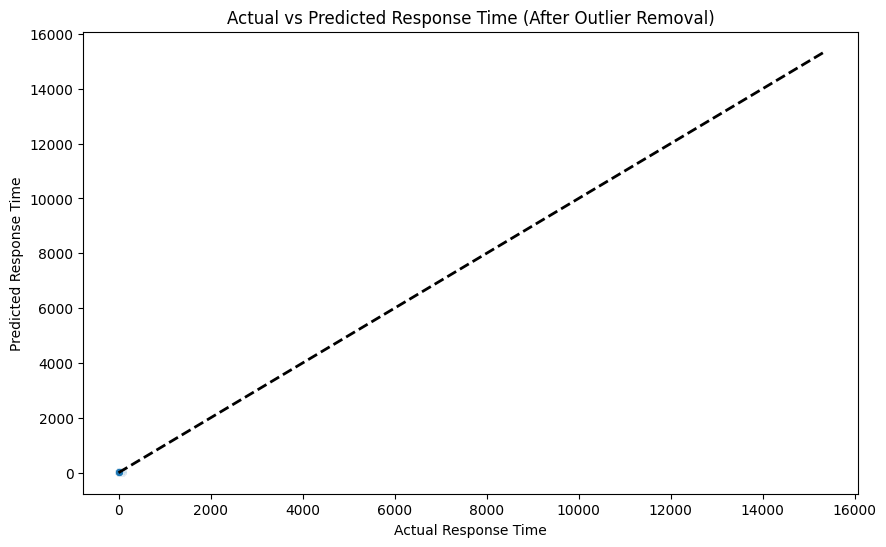

In [147]:
# Plot the actual vs. predicted response times
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Regression line
plt.xlabel('Actual Response Time')
plt.ylabel('Predicted Response Time')
plt.title('Actual vs Predicted Response Time (After Outlier Removal)')
plt.show()

In [148]:
# Assuming data is a DataFrame and 'Response Time' is the target variable
X = data.drop(columns=['Response Time'])
y = data['Response Time']





In [149]:
# Feature Engineering: Polynomial Features
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

ValueError: could not convert string to float: 'SUB000508'

In [110]:
# Train and evaluate Decision Tree model for response time prediction
from sklearn.tree import DecisionTreeRegressor
dt_model_response = DecisionTreeRegressor(random_state=42)
dt_model_response.fit(X_train_response_imputed, y_train_response)
y_pred_response_dt = dt_model_response.predict(X_test_response_imputed)
mae_response_dt = mean_absolute_error(y_test_response, y_pred_response_dt)
rmse_response_dt = np.sqrt(mean_squared_error(y_test_response, y_pred_response_dt))

print(f"Decision Tree - Response Time Prediction: MAE={mae_response_dt}, RMSE={rmse_response_dt}")

Decision Tree - Response Time Prediction: MAE=73.4599599126434, RMSE=451.33381345758494


In [37]:
print(data.columns)

Index(['CI_Name', 'WBS', 'Incident_ID', 'Status', 'Urgency', 'Priority',
       'number_cnt', 'Category', 'KB_number', 'Alert_Status',
       'No_of_Reassignments', 'Open_Time', 'Reopen_Time', 'Resolved_Time',
       'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change',
       'Reported_Date', 'Resolved Date', 'Reported Date', 'Response Time',
       'Reported Hour', 'Reported Weekday', 'CI_Cat_computer',
       'CI_Cat_database', 'CI_Cat_displaydevice', 'CI_Cat_hardware',
       'CI_Cat_networkcomponents', 'CI_Cat_officeelectronics',
       'CI_Cat_software', 'CI_Cat_storage', 'CI_Cat_subapplication',
       'CI_Subcat_Banking Device', 'CI_Subcat_Citrix',
       'CI_Subcat_Client Based Application', 'CI_Subcat_Controller',
       'CI_Subcat_DataCenterEquipment', 'CI_Subcat_Database',
       'CI_Subcat_Desktop', 'CI_Subcat_Desktop Application',
       'CI_